<h1>Лабораторная работа номер 2: Аппроксимация данных</h1>
<h3>Автор: Ячный Марк. 8 группа</h3>

Целью лабораторной работы является исследование аппроксимации функций с помощью полинома Ньютона и сравнение точности её работы при использовании равномерной сетки и при использовании корней Чебышёва.

Исследуемой функцией был немного изменённый кардинальный синус <strong>y = -sinc(1.5x)</strong>. При первом исследовании сетка значений была равномерной размером 20 и полином Ньютона для них строился по формуле для неравномерной сетки (делать отдельную функцию для равномерной сетки было нецелесообразно). Построение графиков исходной функции, обозначение исходных узлов интерполяции, а также значений, принимаемых полиномом Ньютона в изначальных и промежуточных точках, использовались функции библиотеки matplotlib, так как они позволяют легко строить, модифицировать и менять формат графиков. Для исследования точности построения полинома между соседними исходными узлами интерполяции было добавлено по одной точке.

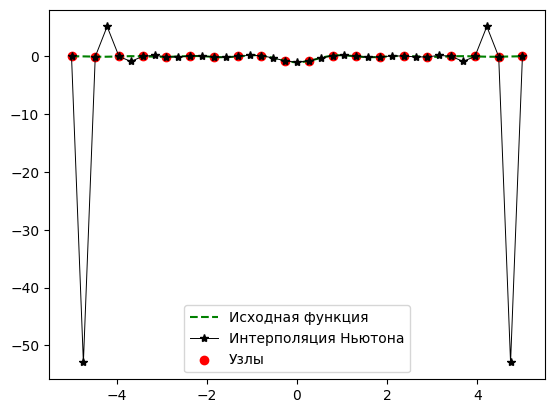

In [4]:
import math

import matplotlib.pyplot as plt
import numpy as np


def read_csv(filename: str):
    X = []
    Y = []
    for line in [_ for _ in open(filename)][1:]:
        args = line.split(';')
        if len(args) != 2:
            raise ValueError
        X.append(float(args[0]))
        Y.append(float(args[1]))
    return X, Y


def newton(X, Y, t):
    res = 0
    for k in range(0, len(X)):
        a = finite_residual(X, Y, 0, k)
        for m in range(0, k):
            a *= (t - X[m])
        res += a
    return res


def finite_residual(X, Y, i, k):
    res = 0
    for m in range(i, i + k + 1):
        a = Y[m]
        for j in range(i, i + k + 1):
            if j == m:
                continue
            a /= (X[m] - X[j])
        res += a
    return res


x, y = read_csv("data.csv")

x_2 = np.linspace(min(x), max(x), len(x) * 2 - 1)
y_2 = [newton(x, y, xx) for xx in x_2]

full_func_x = np.linspace(-5, 5, 200)
full_func_y = [-math.sin(math.pi * 1.5 * t) / (math.pi * 1.5 * t) for t in full_func_x]

plt.plot(full_func_x, full_func_y, linestyle='--', c = 'green', label='Исходная функция')
plt.plot(x_2, y_2, c='black', marker="*", label='Интерполяция Ньютона', linewidth=0.7)
plt.scatter(x, y, c='red', label='Узлы')

plt.legend()
plt.show()


На графике видно, что в середине интервала значения полинома довольно точно совпадают с настоящими значениями функции, но на краях разница становится огромной.

Во втором исследовании в качестве изначальных узлов интерполяции была взята неравномерная сетка, состоящая из 20 корней полинома Чебышёва. Функции, использовавшиеся для построения полинома Ньютона, а также для построения графиков, такие же, как и в первом исследовании. Между соседними изначальными узлами интерполяции также было добавлено по одной точке.

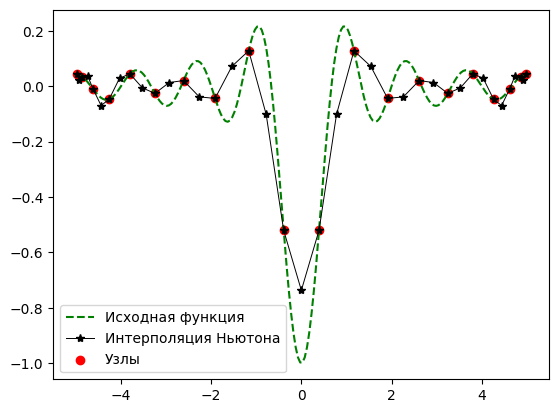

In [6]:
import math

import matplotlib.pyplot as plt
import numpy as np


def newton(X, Y, t):
    res = 0
    for k in range(0, len(X)):
        a = finite_residual(X, Y, 0, k)
        for m in range(0, k):
            a *= (t - X[m])
        res += a
    return res


def finite_residual(X, Y, i, k):
    res = 0
    for m in range(i, i + k + 1):
        a = Y[m]
        for j in range(i, i + k + 1):
            if j == m:
                continue
            a /= (X[m] - X[j])
        res += a
    return res


n = 20
x_cheb = [5 * math.cos(math.pi * (2 * k - 1) / (2 * n)) for k in range(1, n + 1)]
y_cheb = [-math.sin(math.pi * 1.5 * t) / (math.pi * 1.5 * t) for t in x_cheb]

x_2 = [x_cheb[0]]
for i in range(1, len(x_cheb)):
    x_2.append((x_cheb[i - 1] + x_cheb[i]) / 2)
    x_2.append(x_cheb[i])

y_2 = [newton(x_cheb, y_cheb, xx) for xx in x_2]

full_func_x = np.linspace(-5, 5, 200)
full_func_y = [-math.sin(math.pi * 1.5 * t) / (math.pi * 1.5 * t) for t in full_func_x]

plt.plot(full_func_x, full_func_y, linestyle='--', c='green', label='Исходная функция')
plt.plot(x_2, y_2, c='black', marker="*", label='Интерполяция Ньютона', linewidth=0.7)
plt.scatter(x_cheb, y_cheb, c='red', label='Узлы')

plt.legend()
plt.show()


Здесь мы не видим расхождений фунции настолько большого порядка, как в первом исследовании, однако ближе к центру видно расхождение значений, принимаемых полиномом, и настоящих значений функции. 


<strong>Вывод</strong>: при аппроксимации функции полиномом Ньютона по равномерной сетке сильно отличаются предсказанные и настоящие значения ближе к концам отрезка. При использовании сетки, где плотность узлов при приближении к концам отрезка уменьшается, удаётся избежать больших расхождений на концах отрезка, но при этом мы жертвуем точностью в его середине